<a href="https://colab.research.google.com/github/jonahokiru/hello-world/blob/master/Moringa_Dsc14_Core_Machine_Week_8_IP_Jonah_Okiru_04_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Define the question

## a) specifying the question.

Use the data collected by the Nairobi hospital on the hypothroid patients, to build a model that determines if the patient symptoms indicates whether the patient has hypothroid or not.

## b) The metric of success.

The model should be in position to determine if the patient has hypothroid or not with the accuracy score of 70%.

## c) Understanding the contest.

Nairobi hospital is  a hosiptal in based in Nairobi kenya. The hospital deals with the patients suffering from various types of diseases ranging from acute to chronic. In order to determine the type of disease the patient suffers from the hospital uses the patients symptoms.

## d) Recording the experimental design.

Hypothesis: To determine if the patient has hypothroid is dependent on the symptoms exhibit by the patients.

X-axis: AgeSex, on_thyroxine, query_on_thyroxine
on_antithyroid_medicationthyroid_surgery, query_hypothyroid, query_hyperthyroid, pregnant, sick, tumor, lithium, goitre, TSH_measured, TSH,T3_measured, T3, TT4_measured, TT4.

Y-axis: Status.

Experimental set up: I hypothesize the status of hypothroid based on the features stated on the X- axis.

Design of the experiment: Analyze the symptoms of 3164 patients.

# 2. Reading the data.

## a) Import the libraries.

In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

## b) Loading Data.

In [3]:
hypothroid = pd.read_csv('http://bit.ly/hypothyroid_data')

## c) Checking the data.

In [4]:
#Check the number of record in the dataset
hypothroid.shape

(3163, 26)

In [5]:
#Preview the top of the dataset
hypothroid.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?


In [6]:
#preview the bottom of the datasets
hypothroid.tail(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [7]:
#Check the column of the data
hypothroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [8]:
#Check the columns name of the data
hypothroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

# 3. External data validation.

## a) Validation [Hypothroid Symptoms](https://www.mayoclinic.org/diseases-conditions/hypothyroidism/symptoms-causes/syc-20350284)

# 4. Tidying the dataset.

In [31]:
#Checking for the missing values
hypothroid.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [19]:
#Replace the character of ? in the data.
hypothroid ['age']= hypothroid ['age'].str.replace('?', '0', regex=True)
hypothroid ['TSH']= hypothroid ['TSH'].str.replace('?', '0', regex=True)
hypothroid ['T3']= hypothroid ['T3'].str.replace('?', '0', regex=True)
hypothroid ['TT4']= hypothroid ['TT4'].str.replace('?', '0', regex=True)
hypothroid ['T4U']= hypothroid ['T4U'].str.replace('?', '0', regex=True)
hypothroid ['FTI']= hypothroid ['FTI'].str.replace('?', '0', regex=True)
hypothroid ['TBG']= hypothroid ['TBG'].str.replace('?', '0', regex=True)





In [23]:
#Preview the dataset
hypothroid.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,0
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,0


In [65]:
#Convert the column data types from objects to categoricals, integ
hypothroid['sex'] = hypothroid['sex'].astype('category')
hypothroid['status'] = hypothroid['status'].astype('category')
hypothroid['on_thyroxine'] = hypothroid['on_thyroxine'].astype('category')
hypothroid['query_on_thyroxine'] = hypothroid['query_on_thyroxine'].astype('category')
hypothroid['on_antithyroid_medication'] = hypothroid['on_antithyroid_medication'].astype('category')
hypothroid['thyroid_surgery'] = hypothroid['thyroid_surgery'].astype('category')
hypothroid['query_hypothyroid'] = hypothroid['query_hypothyroid'].astype('category')
hypothroid['query_hyperthyroid'] = hypothroid['query_hyperthyroid'].astype('category')
hypothroid['pregnant'] = hypothroid['pregnant'].astype('category')
hypothroid['sick'] = hypothroid['sick'].astype('category')
hypothroid['tumor'] = hypothroid['tumor'].astype('category')
hypothroid['lithium'] = hypothroid['lithium'].astype('category')
hypothroid['goitre'] = hypothroid['goitre'].astype('category')
hypothroid['TSH_measured'] = hypothroid['TSH_measured'].astype('category')
hypothroid['T3_measured'] = hypothroid['T3_measured'].astype('category')
hypothroid['TT4_measured'] = hypothroid['TT4_measured'].astype('category')
hypothroid['T4U_measured'] = hypothroid['T4U_measured'].astype('category')
hypothroid['FTI_measured'] = hypothroid['FTI_measured'].astype('category')
hypothroid['TBG_measured'] = hypothroid['TBG_measured'].astype('category')
hypothroid['age'] = hypothroid['age'].astype('int')
hypothroid['TSH'] = hypothroid['TSH'].astype('float')
hypothroid['T3'] = hypothroid['T3'].astype('float')
hypothroid['TT4'] = hypothroid['TT4'].astype('float')
hypothroid['T4U'] = hypothroid['T4U'].astype('float')
hypothroid['FTI'] = hypothroid['FTI'].astype('float')
hypothroid['TBG'] = hypothroid['TBG'].astype('float')
hypothroid['T4U'] = hypothroid['T4U'].astype('float')




In [66]:
#preview the data types of the columns
hypothroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3163 non-null   category
 1   age                        3163 non-null   int64   
 2   sex                        3163 non-null   category
 3   on_thyroxine               3163 non-null   category
 4   query_on_thyroxine         3163 non-null   category
 5   on_antithyroid_medication  3163 non-null   category
 6   thyroid_surgery            3163 non-null   category
 7   query_hypothyroid          3163 non-null   category
 8   query_hyperthyroid         3163 non-null   category
 9   pregnant                   3163 non-null   category
 10  sick                       3163 non-null   category
 11  tumor                      3163 non-null   category
 12  lithium                    3163 non-null   category
 13  goitre                     3163 n

In [67]:
#Convert the categorical to numericals
hypothroid['sex'] = labelencoder.fit_transform(hypothroid['sex'])
hypothroid['status'] = labelencoder.fit_transform(hypothroid['status'])
hypothroid['on_thyroxine'] = labelencoder.fit_transform(hypothroid['on_thyroxine'])
hypothroid['query_on_thyroxine'] = labelencoder.fit_transform(hypothroid['query_on_thyroxine'])
hypothroid['on_antithyroid_medication'] = labelencoder.fit_transform(hypothroid['on_antithyroid_medication'])
hypothroid['thyroid_surgery'] = labelencoder.fit_transform(hypothroid['thyroid_surgery'])
hypothroid['query_hypothyroid'] = labelencoder.fit_transform(hypothroid['query_hypothyroid'])
hypothroid['query_hyperthyroid'] = labelencoder.fit_transform(hypothroid['query_hyperthyroid'])
hypothroid['pregnant'] = labelencoder.fit_transform(hypothroid['pregnant'])
hypothroid['sick'] = labelencoder.fit_transform(hypothroid['sick'])
hypothroid['tumor'] = labelencoder.fit_transform(hypothroid['tumor'])
hypothroid['lithium'] = labelencoder.fit_transform(hypothroid['lithium'])
hypothroid['goitre'] = labelencoder.fit_transform(hypothroid['goitre'])
hypothroid['TSH_measured'] = labelencoder.fit_transform(hypothroid['TSH_measured'])
hypothroid['T3_measured'] = labelencoder.fit_transform(hypothroid['T3_measured'])
hypothroid['TT4_measured'] = labelencoder.fit_transform(hypothroid['TT4_measured'])
hypothroid['T4U_measured'] = labelencoder.fit_transform(hypothroid['T4U_measured'])
hypothroid['FTI_measured'] = labelencoder.fit_transform(hypothroid['FTI_measured'])
hypothroid['TBG_measured'] = labelencoder.fit_transform(hypothroid['TBG_measured'])




In [68]:
#Preview the dataset
hypothroid.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,72,2,0,0,0,0,0,0,0,...,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0
1,0,15,1,1,0,0,0,0,0,0,...,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0


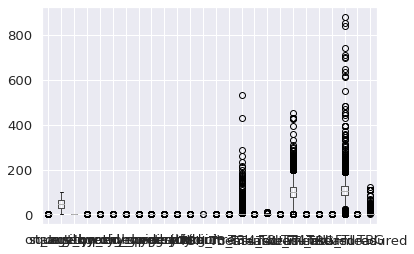

In [69]:
#Check for the outliers
hypothroid.boxplot()

# 5. Implementing the solution.

## a). Part 1: Decision trees

### (i). Random forests.

In [70]:
# Split the datasets into depedent and independent variables
y = hypothroid['status'].values
test_features = hypothroid.columns.to_list()
test_features.remove('status')
X = hypothroid [test_features].values

In [71]:
#Train using the 75% of the datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [72]:
#import the model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200)
#Trained the model
forest = forest.fit(X_train, y_train)
# Predict based on the model we've trained
y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()


,Actual,Predicted
count,791.000000,791.000000
mean,0.954488,0.954488
std,0.208556,0.208556
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [73]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Mean Absolute Error: 0.015170670037926675
Mean Squared Error: 0.015170670037926675
Root Mean Squared Error: 0.12316927391978356
Accuracy: 0.9848293299620733


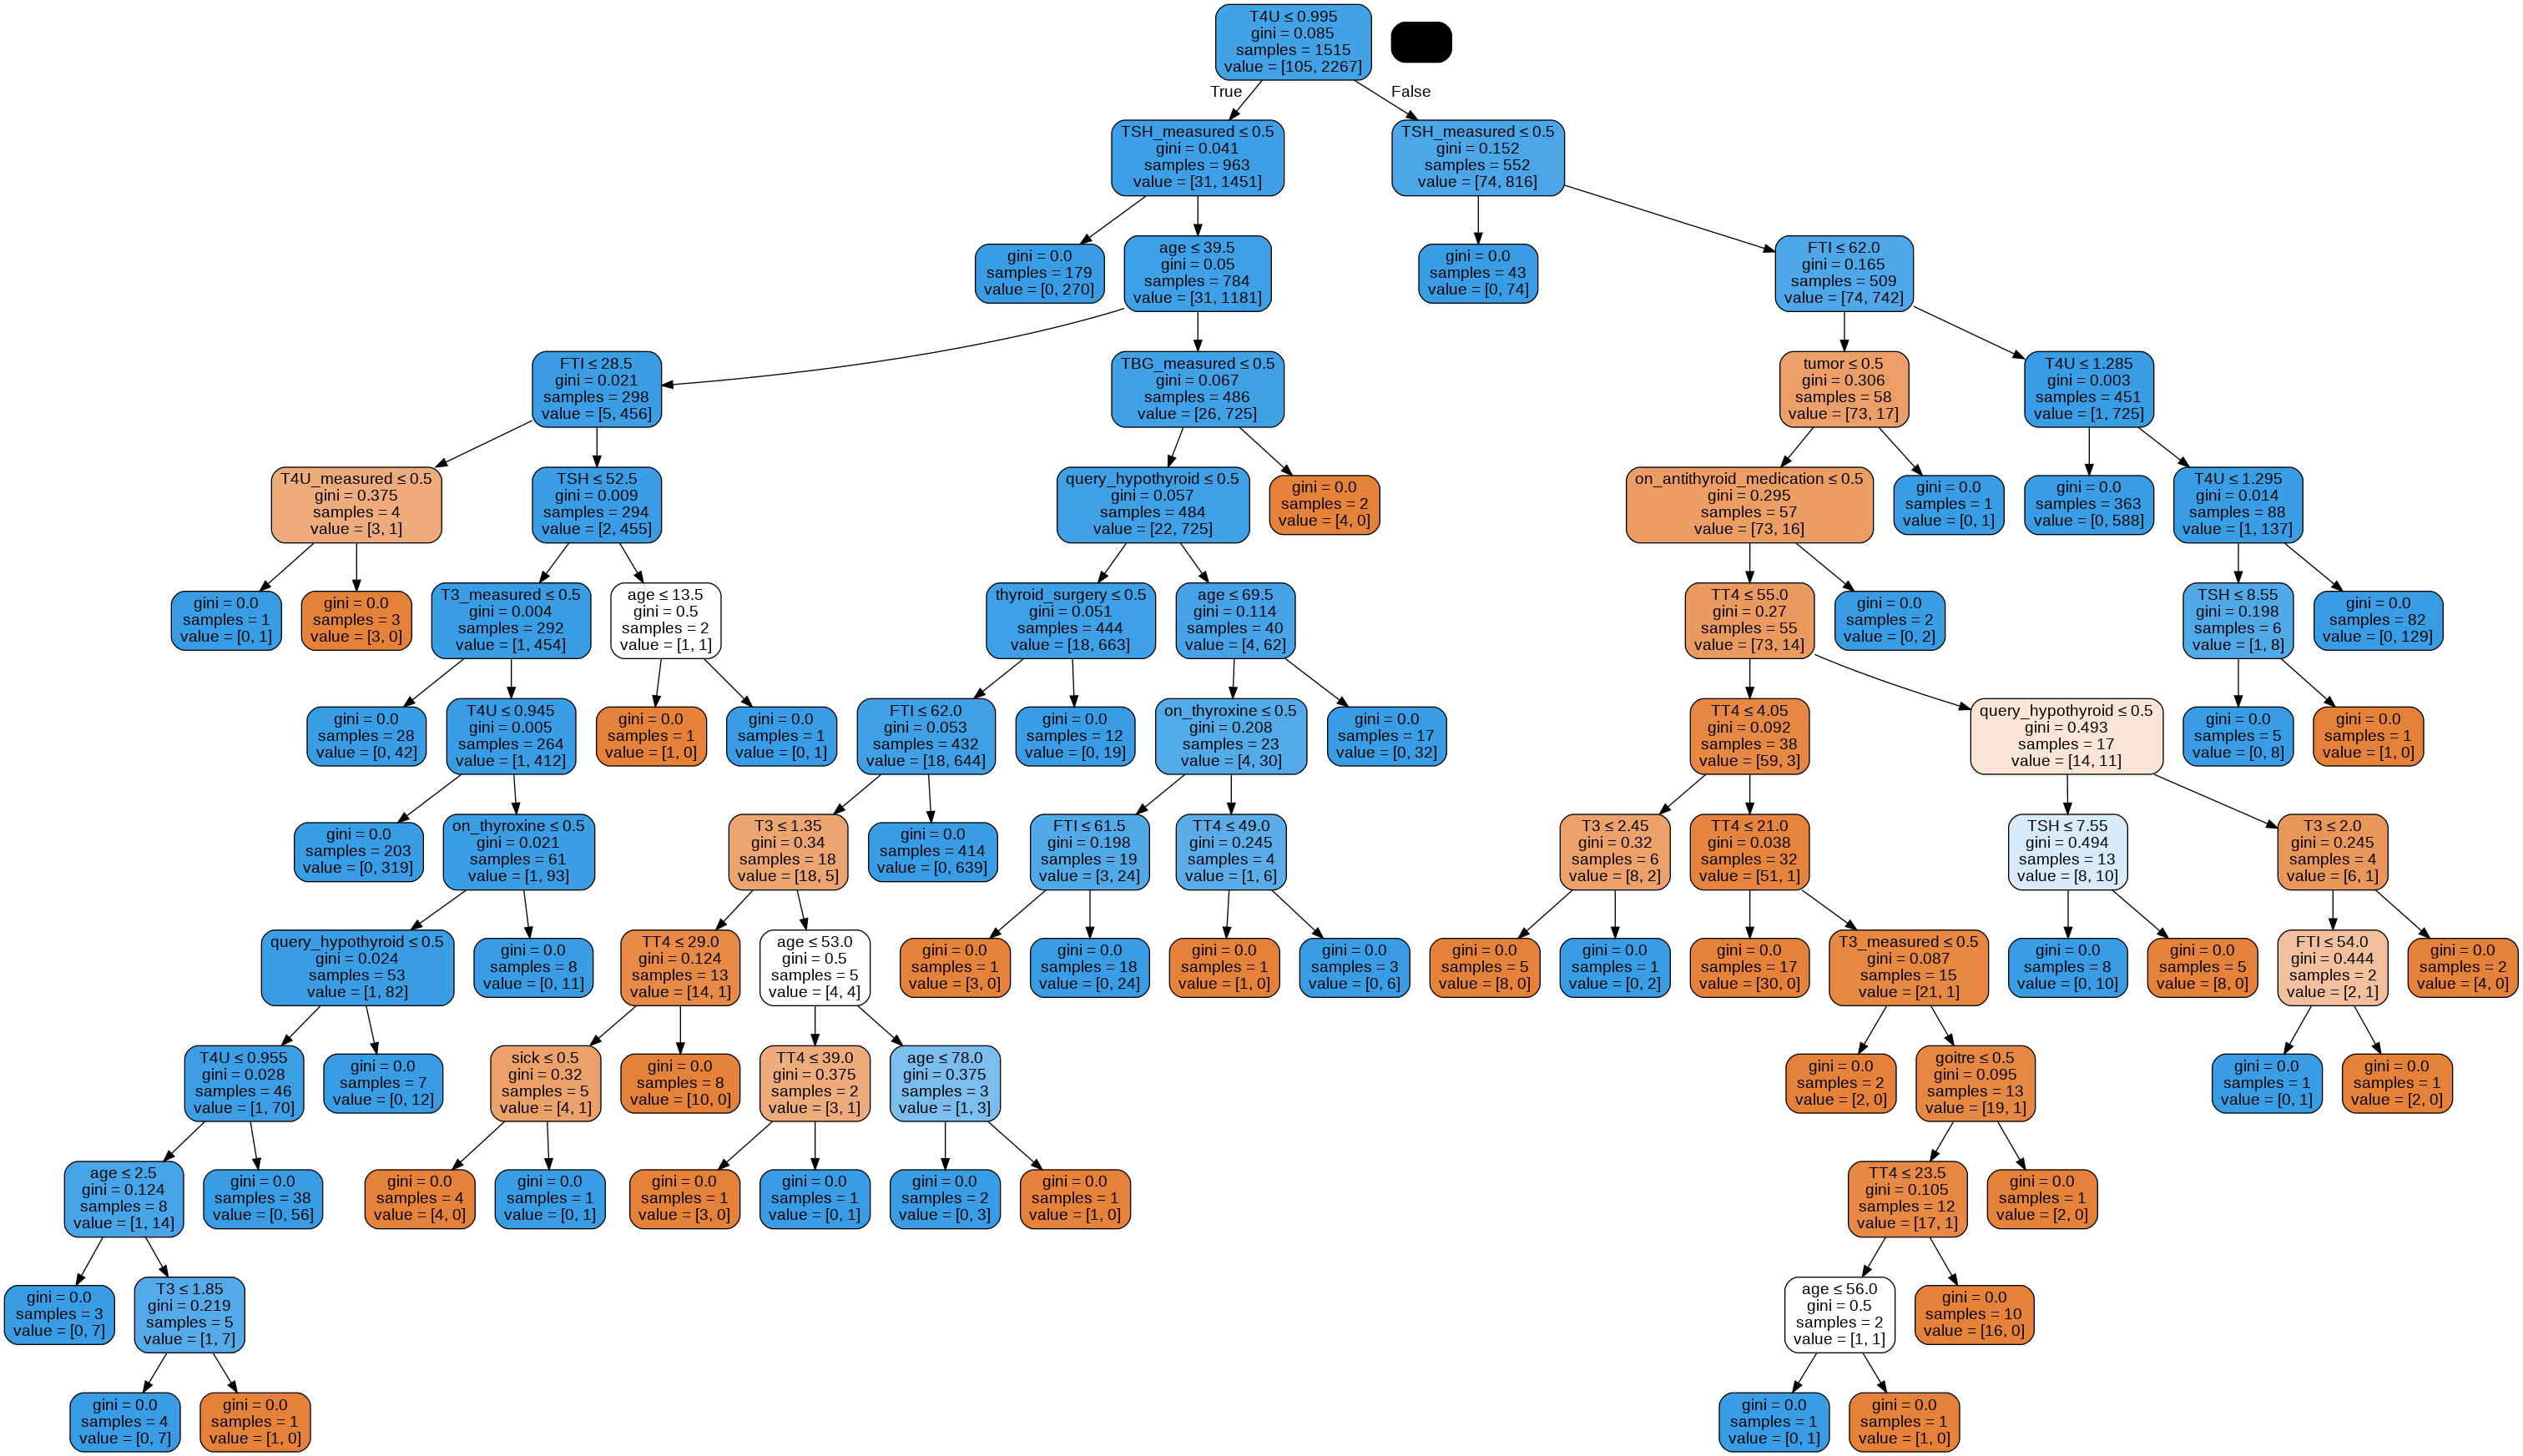

In [74]:
#Visualize the random forest
#Visualize
dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('deposit_forest.png')
Image(graph.create_png())

### (ii) Ada boost trees

In [75]:
#Adaboost model
adaboost = AdaBoostClassifier(n_estimators=200)
adaboost_model=adaboost.fit(X_train, y_train)

In [76]:
#Prediction
y_pred=adaboost_model.predict(X_test)

In [77]:
#The accuracy score of the adaboostclassifiers
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9823008849557522


### (iii). Gradient boost.

In [78]:
#Gradient boost model
gradientboost = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1)
gradientboost_model = gradientboost.fit(X_train, y_train)


In [79]:
#Prediction
y_pred=gradientboost_model.predict(X_test)


In [80]:
#Check for the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9873577749683944


# b) Part 2: SVM (Support Vector Machine)



### (i)Linear

In [82]:
## Applying the reduction algorithm: PCA. To reduce the number of features to  2 for easy visualization
hypothroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   int64  
 1   age                        3163 non-null   int64  
 2   sex                        3163 non-null   int64  
 3   on_thyroxine               3163 non-null   int64  
 4   query_on_thyroxine         3163 non-null   int64  
 5   on_antithyroid_medication  3163 non-null   int64  
 6   thyroid_surgery            3163 non-null   int64  
 7   query_hypothyroid          3163 non-null   int64  
 8   query_hyperthyroid         3163 non-null   int64  
 9   pregnant                   3163 non-null   int64  
 10  sick                       3163 non-null   int64  
 11  tumor                      3163 non-null   int64  
 12  lithium                    3163 non-null   int64  
 13  goitre                     3163 non-null   int64

In [83]:
# Applying the reduction algorithm: PCA to reduce the number of features to 2
pca = PCA(n_components=2).fit(X)
X1 = pca.transform(X)
X1.shape

(3163, 2)

In [84]:
#Train the model again y and X1 variables
#Train using the 75% of the datasets
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=0)

In [86]:
#Apply the linear model
# Fit the model
linear = SVC(kernel= 'linear')
linear_model = linear.fit(X1_train,y_train)

In [87]:
#Make the prediction using the linear model
y_pred= linear_model.predict(X1_test)

In [89]:
#Check the accuracy score and confusion matrix of the linear model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.95448798988622
[[  0  36]
 [  0 755]]


In [ ]:
#Visualize the linear model
